<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 2</h2><br/>
<h1>Árboles de decisión</h1>
<br/><br/>
    <b>Instructor Principal:</b> Patricio Olivares polivares@codingdojo.cl <br/>
    <b>Instructor Asistente:</b> Jesús Ortiz jortiz@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Árboles de decisión (Decision Trees)

- Versátil algoritmo de ML
- Puedes ser usado para clasificación y regresión
- Componente básica para los algoritmos de Bosques Aleatorios (Random Forest)

# Árboles de decisión (Decision Trees)

In [15]:
# Ejemplo
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2: ] # Solo columnas de largo y ancho del pétalo
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(133.92000000000002, 181.2, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(200.88000000000002, 108.72, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

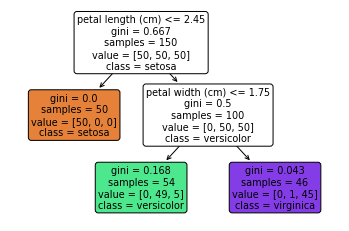

In [16]:
# Visualizando árbol de decisión
from sklearn import tree
tree.plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

- **Samples**: Número de instancias de entrenamiento a los cuales se les aplica un cierto nodo
- **Value**: Número de instancias de entrenamiento de cada clase se les aplica un cierto nodo
- **Gini**: Medición de *impureza*. Si ```gini=0```, todas las instancias a las cuales el nodo aplica, pertenecen a la misma clase.

Ej. cálculo de Impureza Gini:

$$ G_i = 1 - \sum_{k=1}^n p_{i,k}^2 = 1 - \left(\frac{0}{54}\right)^2 + \left(\frac{49}{54}\right)^2 + \left(\frac{5}{54}\right)^2 \approx 0.168$$

$p_{i,k}$ es la razón entre instancias de clase $k$ vs instancias del nodo $i$ (revisar *value*)

- A partir del árbol de decisión es posible obtener la probabilidad de que una nueva instancia pertenezca a una cierta clase.
- La nueva instancia pertenecerá a aquella clase con mayor probabilidad

In [17]:
# Nueva instancia
y_new = [[5, 1.5]]
# Probabilidades por cada clase
print(tree_clf.predict_proba(y_new))
# Clase predicha
print(tree_clf.predict(y_new))


[[0.         0.90740741 0.09259259]]
[1]


# Aprendizaje ensamblado (Ensemble Learning)

- Se basa en el concepto "la sabiduría de la multitud" (wisdom of the crowd)
- Entrenar múltiples predictores y juntas sus respuestas, a menudo obtendrás mejores predicciones que la predicción del mejor predictor.
- Respuesta final puede ser por votación (mayor cantidad de votos, gana), promedio, etc.

<img src="images/ensembleLearning.png" alt="" width="800px" align="center"/>

# Bagging and pasting

- Ante un modelo ensamblado, podemos entrenar un mismo clasificador tomando diferentes muestras de nuestro set de datos **con o sin reemplazo**
    - Entrenamiento con reemplazo: *bagging*
    - Entrenamiento sin reemplazo: *pasting*

# Bagging and pasting (ejemplo)

- Entrenamiento de 500 árboles de decisión ensamblados
- Cada uno entrenado con 100 muestras con reemplazo (bagging (para pasting, bootstrap=False)) 

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:, 2: ] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(y_pred)
print(y_test)
bag_clf.score(X_test, y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


1.0

# Bosques aleatorios (Random Forests)

- Random Forests es un modelo ensamblado de árboles de decisión (como el presentado anteriormente)
- Scikit-Learn entrega la clase RandomForestClassifier la cual es mucho más conveniente y optimizada a árboles de decisión.

In [30]:
from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=500)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

print(y_pred)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


# Actividad 5

A partir del dataset de supervivencia del titanic, disponible [aquí](data/titanic.csv), utilice los algoritmos de Decision Tree y Random Forests para determinar la supervivencia de los pasajeros.

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.